In [1]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [2]:
#reading the data
pd.set_option('display.float_format', '{:.5f}'.format)
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
df=pd.read_csv('Train.csv')

In [3]:
df.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.00000,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.00000,Boring,Electric,200.00000,2.00000,NaN,NaN,NaN,NaN,2,Urea,NaN,20.00000,Broadcasting,Urea,15.00000,18.00000,NaN,NaN,Broadcasting,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.31250,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.00000,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.00000,Boring,Electric,125.00000,3.00000,NaN,NaN,NaN,NaN,2,DAP Urea,15.00000,10.00000,Broadcasting,Urea,20.00000,39.00000,NaN,NaN,Broadcasting,hand,2022-11-25,3.00000,2022-12-24,machine,24,10,plowed_in_soil,0.31250,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.00000,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.00000,Boring,Electric,80.00000,2.00000,Ganaura FYM,1.00000,1.00000,SoilApplied,2,DAP,4.00000,NaN,SoilApplied,Urea,5.00000,65.00000,NaN,NaN,RootApplication,hand,2022-12-12,480.00000,2023-01-11,machine,30,10,plowed_in_soil,0.14815,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.00000,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,NaN,NaN,NaN,NaN,NaN,Ganaura,1.00000,NaN,SoilApplied,2,DAP Urea,6.00000,3.00000,Broadcasting,Urea,5.00000,5.00000,NaN,NaN,Broadcasting,hand,2022-12-02,240.00000,2022-12-29,hand,26,10,plowed_in_soil,0.22222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.00000,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.00000,Boring,Electric,300.00000,2.00000,NaN,NaN,NaN,NaN,2,Urea DAP,15.00000,30.00000,Broadcasting,Urea,30.00000,26.00000,NaN,NaN,Broadcasting,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.46875,550


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

In [5]:
df.shape

(3870, 44)

In [6]:
round((df.isnull().sum()/len(df))*100,0)

ID                                    0.00000
District                              0.00000
Block                                 0.00000
CultLand                              0.00000
CropCultLand                          0.00000
LandPreparationMethod                 0.00000
CropTillageDate                       0.00000
CropTillageDepth                      0.00000
CropEstMethod                         0.00000
RcNursEstDate                         2.00000
SeedingSowingTransplanting            0.00000
SeedlingsPerPit                       7.00000
NursDetFactor                         7.00000
TransDetFactor                        7.00000
TransplantingIrrigationHours          5.00000
TransplantingIrrigationSource         3.00000
TransplantingIrrigationPowerSource   13.00000
TransIrriCost                        23.00000
StandingWater                         6.00000
OrgFertilizers                       34.00000
Ganaura                              62.00000
CropOrgFYM                        

##Performing some EDA to extract some key insights

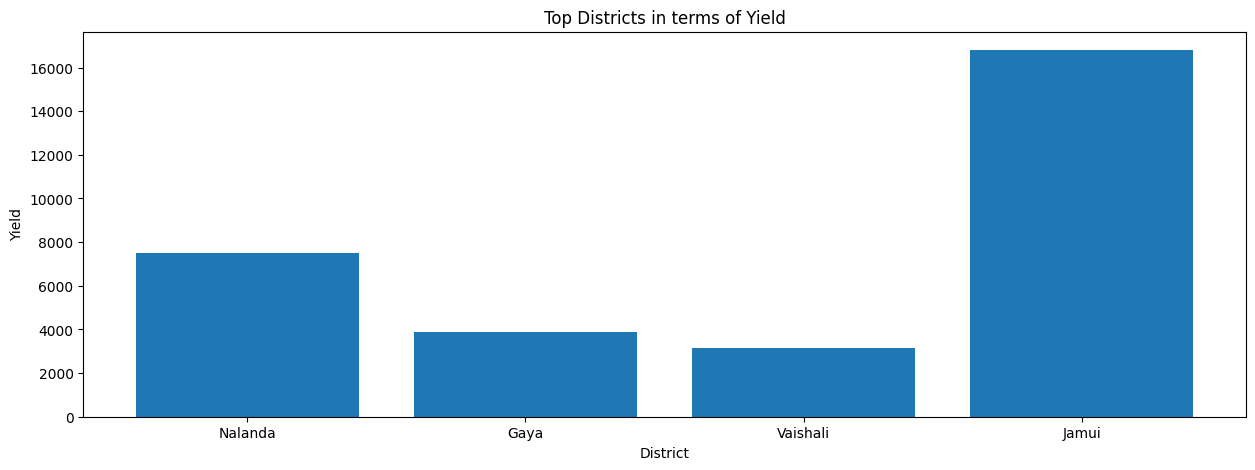

In [7]:
plt.figure(figsize=(15,5))
plt.bar(df['District'],df['Yield'])
plt.xlabel('District')
plt.ylabel('Yield')
plt.title('Top Districts in terms of Yield')
plt.show()

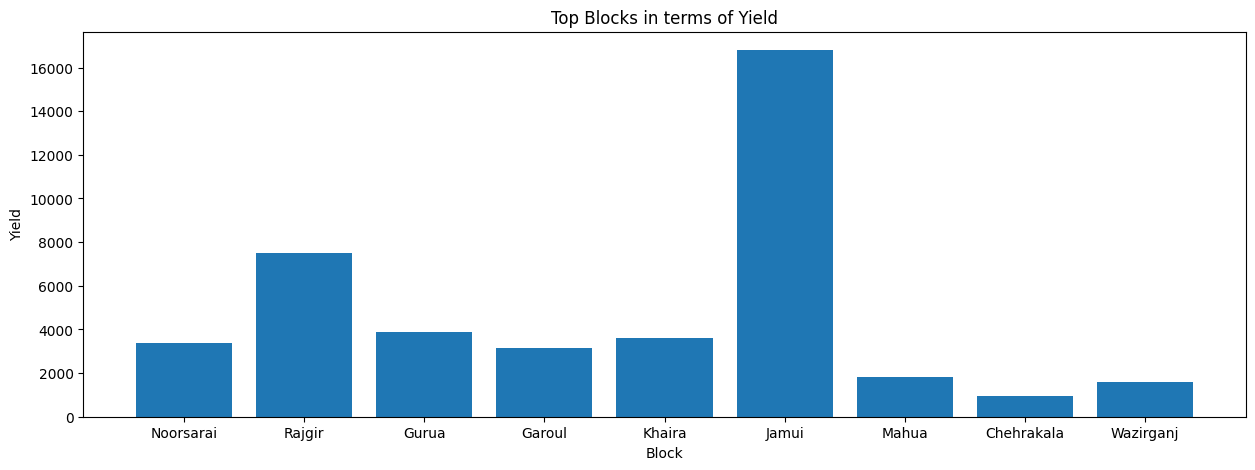

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(df['Block'],df['Yield'])
plt.xlabel('Block')
plt.ylabel('Yield')
plt.title('Top Blocks in terms of Yield')
plt.show()

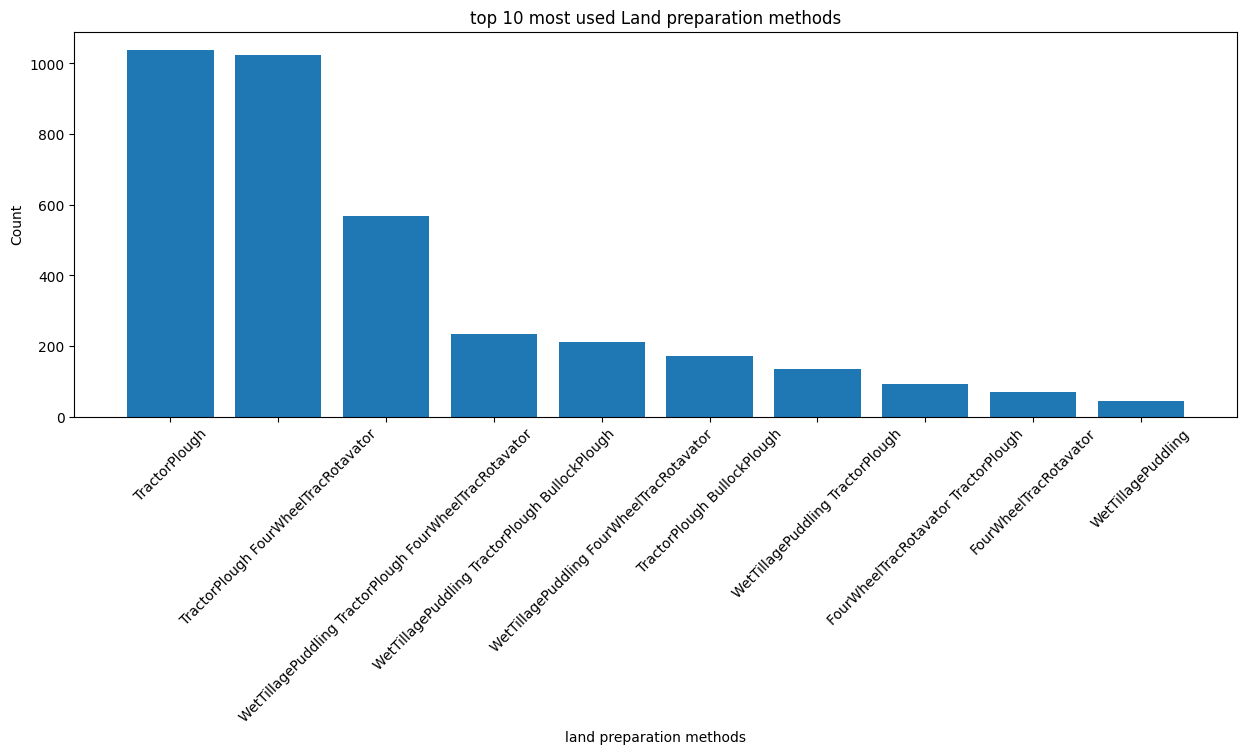

In [ ]:
lpm = df['LandPreparationMethod'].value_counts()[:10]
plt.figure(figsize=(15,5))
plt.bar(lpm.index, lpm)
plt.xlabel('land preparation methods')
plt.ylabel('Count')
plt.title('top 10 most used Land preparation methods')
plt.xticks(rotation=45)
plt.show()

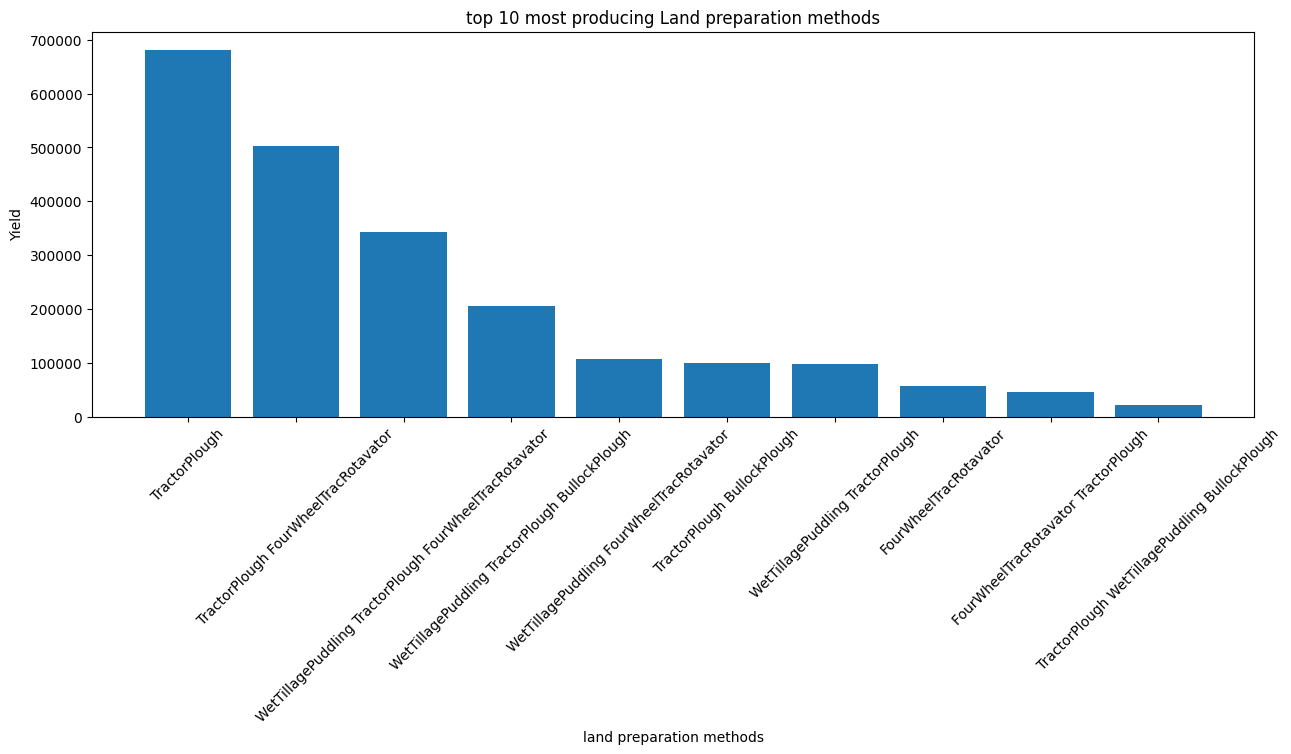

In [ ]:
lpm = df.groupby(['LandPreparationMethod'])['Yield'].sum().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(15,5))
plt.bar(lpm['LandPreparationMethod'], lpm['Yield'])
plt.xlabel('land preparation methods')
plt.ylabel('Yield')
plt.title('top 10 most producing Land preparation methods')
plt.xticks(rotation=45)
plt.show()

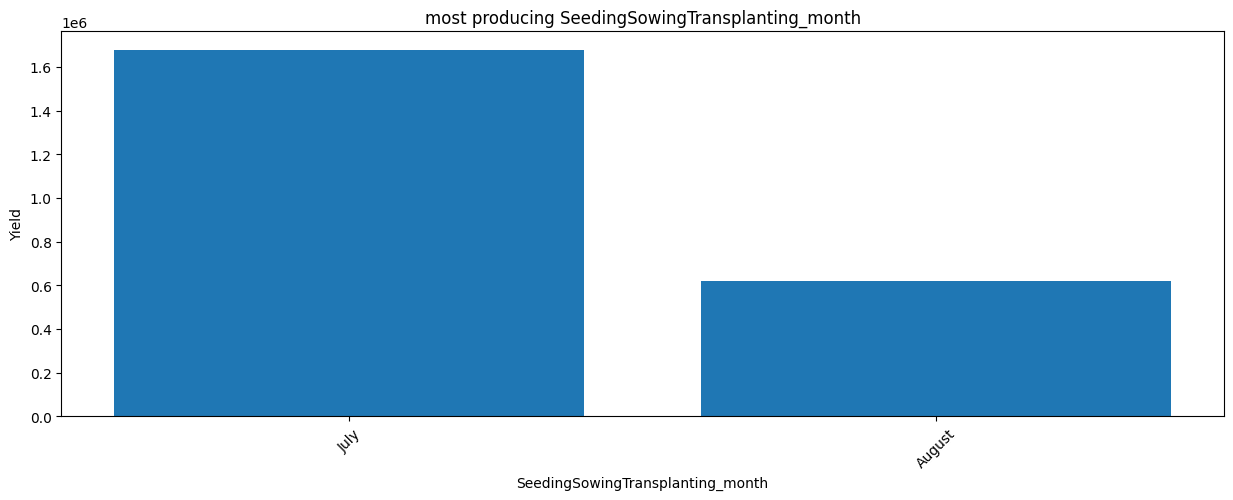

In [ ]:
stm = df.groupby(['SeedingSowingTransplanting_month'])['Yield'].sum().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(15,5))
plt.bar(stm['SeedingSowingTransplanting_month'], stm['Yield'])
plt.xlabel('SeedingSowingTransplanting_month')
plt.ylabel('Yield')
plt.title('most producing SeedingSowingTransplanting_month')
plt.xticks(rotation=45)
plt.show()

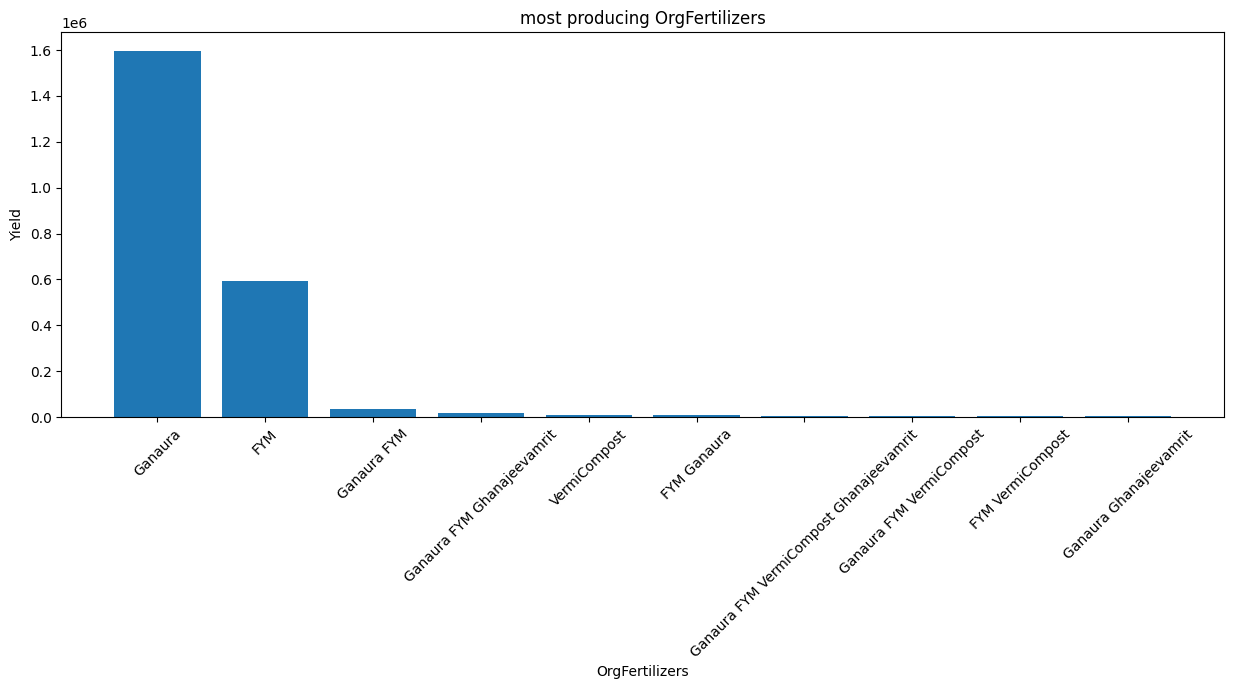

In [ ]:
of = df.groupby(['OrgFertilizers'])['Yield'].sum().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(15,5))
plt.bar(of['OrgFertilizers'], of['Yield'])
plt.xlabel('OrgFertilizers')
plt.ylabel('Yield')
plt.title('most producing OrgFertilizers')
plt.xticks(rotation=45)
plt.show()

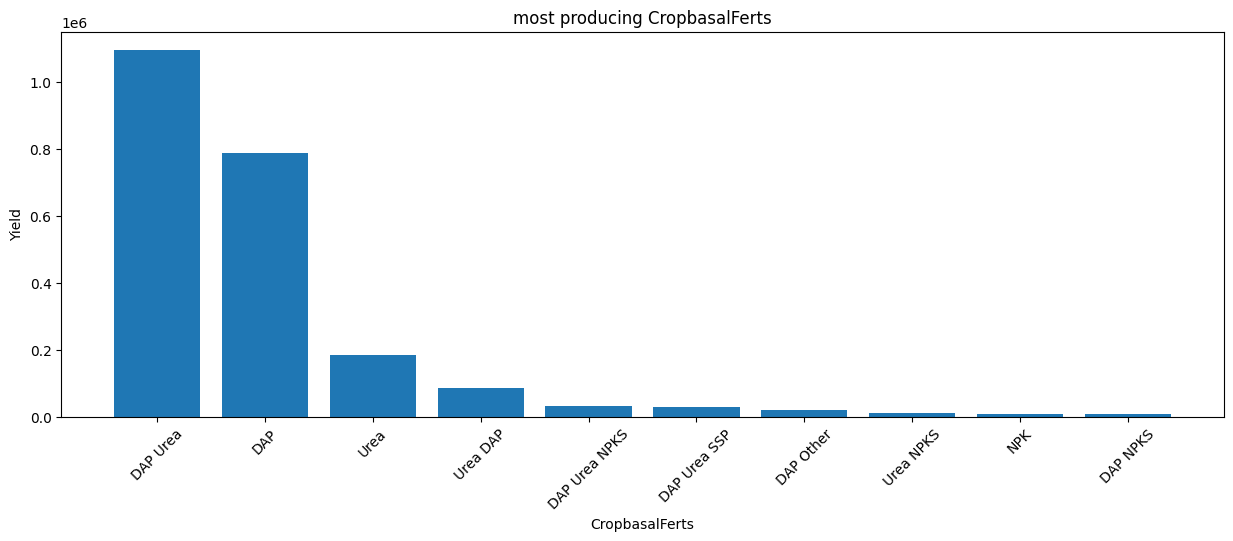

In [ ]:
cf = df.groupby(['CropbasalFerts'])['Yield'].sum().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(15,5))
plt.bar(cf['CropbasalFerts'], cf['Yield'])
plt.xlabel('CropbasalFerts')
plt.ylabel('Yield')
plt.title('most producing CropbasalFerts')
plt.xticks(rotation=45)
plt.show()

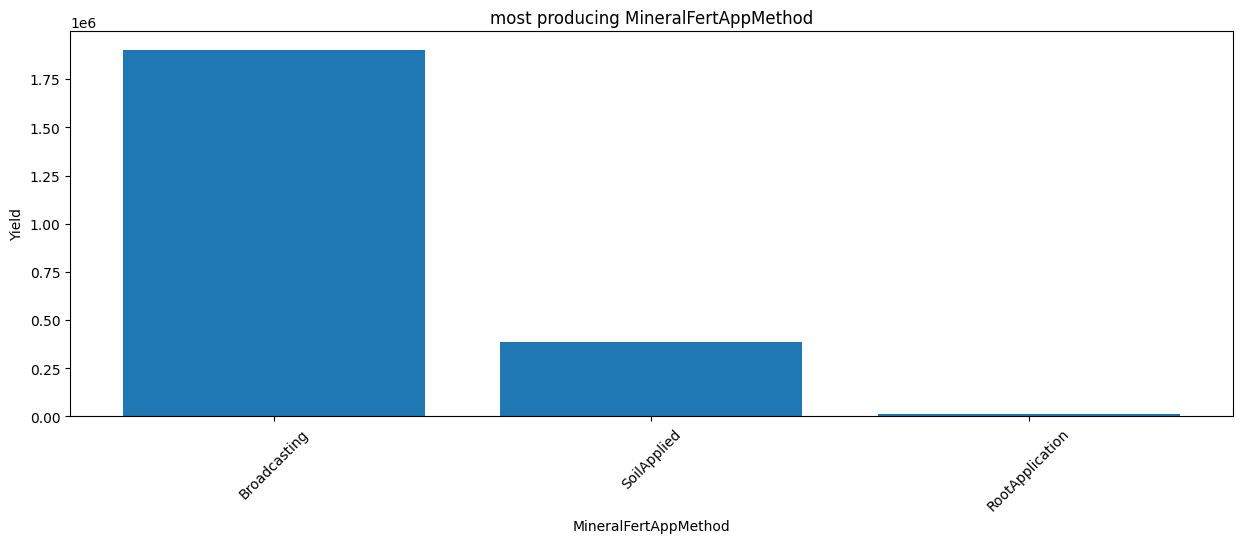

In [ ]:
mam = df.groupby(['MineralFertAppMethod'])['Yield'].sum().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(15,5))
plt.bar(mam['MineralFertAppMethod'], mam['Yield'])
plt.xlabel('MineralFertAppMethod')
plt.ylabel('Yield')
plt.title('most producing MineralFertAppMethod')
plt.xticks(rotation=45)
plt.show()

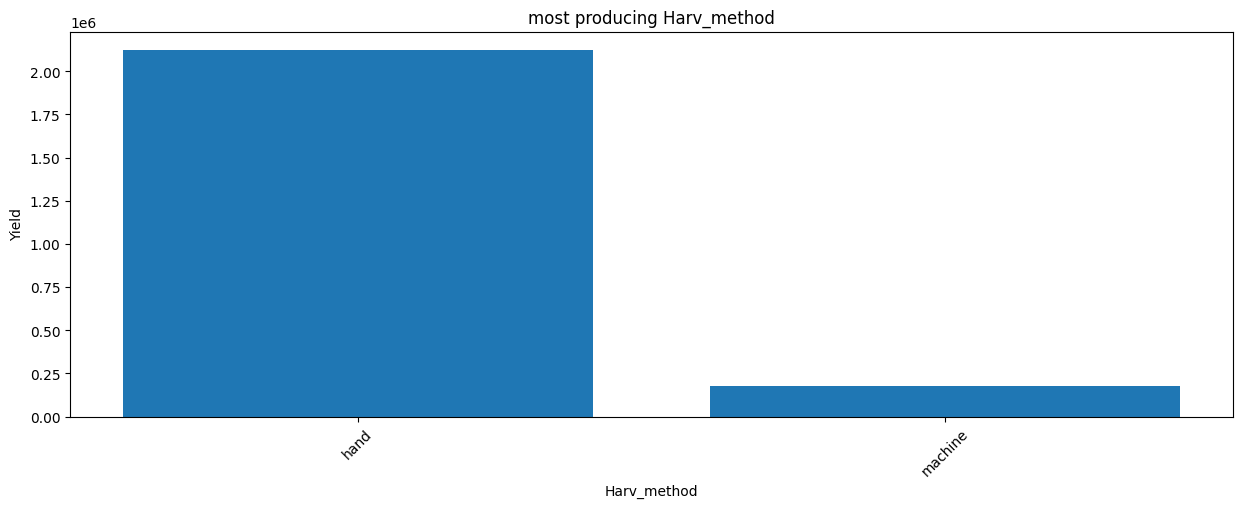

In [ ]:
hm = df.groupby(['Harv_method'])['Yield'].sum().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(15,5))
plt.bar(hm['Harv_method'], hm['Yield'])
plt.xlabel('Harv_method')
plt.ylabel('Yield')
plt.title('most producing Harv_method')
plt.xticks(rotation=45)
plt.show()

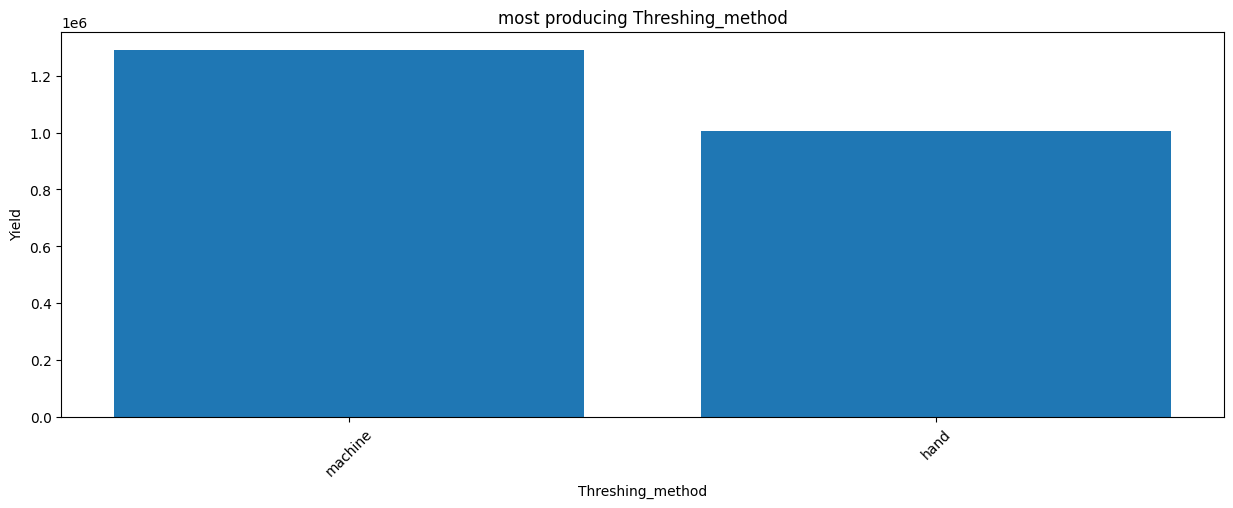

In [ ]:
tm = df.groupby(['Threshing_method'])['Yield'].sum().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(15,5))
plt.bar(tm['Threshing_method'], tm['Yield'])
plt.xlabel('Threshing_method')
plt.ylabel('Yield')
plt.title('most producing Threshing_method')
plt.xticks(rotation=45)
plt.show()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CultLand,3870.00000,28.52791,30.45422,1.00000,12.00000,20.00000,35.00000,800.00000
CropCultLand,3870.00000,24.72713,27.99480,1.00000,10.00000,20.00000,30.00000,800.00000
CropTillageDepth,3870.00000,4.48837,1.13304,1.00000,4.00000,4.00000,5.00000,8.00000
SeedlingsPerPit,3581.00000,2.70651,7.62440,1.00000,2.00000,2.00000,3.00000,442.00000
TransplantingIrrigationHours,3677.00000,8.01768,42.61247,1.00000,2.00000,4.00000,6.00000,2000.00000
TransIrriCost,2988.00000,379.72691,419.72478,1.00000,150.00000,250.00000,450.00000,6000.00000
StandingWater,3632.00000,3.24752,2.20728,1.00000,2.00000,3.00000,4.00000,15.00000
Ganaura,1453.00000,29.73159,122.68088,1.00000,1.00000,3.00000,4.00000,1400.00000
CropOrgFYM,1196.00000,57.44565,328.25161,1.00000,1.00000,2.00000,5.00000,4000.00000
NoFertilizerAppln,3870.00000,2.18450,0.63463,1.00000,2.00000,2.00000,3.00000,4.00000


In [8]:
#dropping the ID column
df.drop('ID',axis=1,inplace=True)

In [9]:
#creating a class to do data cleaning
class DataCleaning:
  def __init__(self, df):
    self.df = df

  def dropna(self):
    for col in self.df.columns:
      if ((self.df[col].isnull().sum() / len(self.df)) * 100) > 50:
        self.df.drop(col, inplace=True, axis=1)

  def imputer(self):
    for col in self.df.columns:
      if self.df[col].dtype == 'object':
        self.df[col].fillna(self.df[col].mode().iloc[0], inplace=True)
      else:
        self.df[col].fillna(self.df[col].median(), inplace=True)

  def convert_to_date_and_extract_month(self):
    date_cols = ['Harv_date', 'Threshing_date', 'CropTillageDate', 'RcNursEstDate', 'SeedingSowingTransplanting']
    for col in date_cols:
      col.replace('Date', '').replace('date', '')
      self.df[col] = pd.to_datetime(self.df[col])
      self.df[col + '_month'] = self.df[col].dt.month_name()
    self.df.drop(date_cols, axis=1, inplace=True)

  def conduct_t_test(self, target_column):
    binary_cols = [col for col in self.df.columns if self.df[col].dtype=='object' and self.df[col].nunique() == 2]
    binary_df = self.df[binary_cols]
    binary_df['Yield'] = self.df['Yield']

    t_test_results = []
    for column in binary_cols:
      unique_values = binary_df[column].unique()

      t_stat, p_value = ttest_ind(binary_df[binary_df[column] == unique_values[0]][target_column],
                                        binary_df[binary_df[column] == unique_values[1]][target_column])

      t_test_results.append({'Column': column, 'T-Statistic': t_stat, 'P-value': p_value})

    t_test_results_df = pd.DataFrame(t_test_results)

    significant_columns = t_test_results_df[t_test_results_df['P-value'] < 0.05]
    insignificant_columns = t_test_results_df[t_test_results_df['P-value'] >= 0.05]

    binary_df.drop(columns=insignificant_columns['Column'], inplace=True)
    binary_df.drop(['Yield'],axis=1,inplace=True)
    return binary_df

  def conduct_anova_test(self, target_column):
    anova_results = []
    anova_columns = [col for col in self.df.columns if self.df[col].dtype=='object' and self.df[col].nunique() > 2 ]
    cat_df = self.df[anova_columns]
    cat_df['Yield'] = self.df['Yield']
    for category in cat_df.columns:
      f_statistic, p_value = f_oneway(*[cat_df[target_column][cat_df[category] == value] for value in cat_df[category].unique()])
      anova_results.append({'Column': category, 'F-statistic': f_statistic, 'P-value': p_value})

    anova_results_df = pd.DataFrame(anova_results)

    significant_columns = anova_results_df[anova_results_df['P-value'] <= 0.05]
    insignificant_columns = anova_results_df[anova_results_df['P-value'] > 0.05]

    cat_df.drop(columns=insignificant_columns['Column'], inplace=True)
    cat_df.drop(['Yield'],axis=1,inplace=True)
    return cat_df

  def handle_correlation(self, target_column, binary_df, cat_df):
    num_df = self.df.select_dtypes(include='number')
    corr_with_target = num_df.corr()[target_column]
    correlated_columns = corr_with_target[corr_with_target > 0.5].index.tolist()
    num_df_correlated = num_df[correlated_columns]

    merged_df = pd.concat([binary_df, cat_df, num_df_correlated], axis=1)
    return merged_df

instance=DataCleaning(df)

In [10]:
instance.dropna()
instance.imputer()
instance.convert_to_date_and_extract_month()
binary_df = instance.conduct_t_test('Yield')
cat_df = instance.conduct_anova_test('Yield')
final_df = instance.handle_correlation('Yield', binary_df, cat_df)

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Harv_method                       3870 non-null   object 
 1   Threshing_method                  3870 non-null   object 
 2   RcNursEstDate_month               3870 non-null   object 
 3   SeedingSowingTransplanting_month  3870 non-null   object 
 4   District                          3870 non-null   object 
 5   Block                             3870 non-null   object 
 6   LandPreparationMethod             3870 non-null   object 
 7   CropEstMethod                     3870 non-null   object 
 8   NursDetFactor                     3870 non-null   object 
 9   TransDetFactor                    3870 non-null   object 
 10  TransplantingIrrigationSource     3870 non-null   object 
 11  CropbasalFerts                    3870 non-null   object 
 12  FirstT

In [13]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Acre,3870.00000,0.29283,0.20692,0.04545,0.15625,0.22727,0.37037,2.18750
Yield,3870.00000,594.26925,651.91695,4.00000,300.00000,425.00000,740.00000,16800.00000


In [14]:
#splitting the data into x and y
X = final_df.iloc[:, :-1]
y = final_df.iloc[:,-1:]

In [15]:
#splitting the data into train and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [16]:
#merging the x and y training data to check for outliers in the training set
training_data = pd.concat([X_train, y_train[y_train.columns[0]]], axis=1)

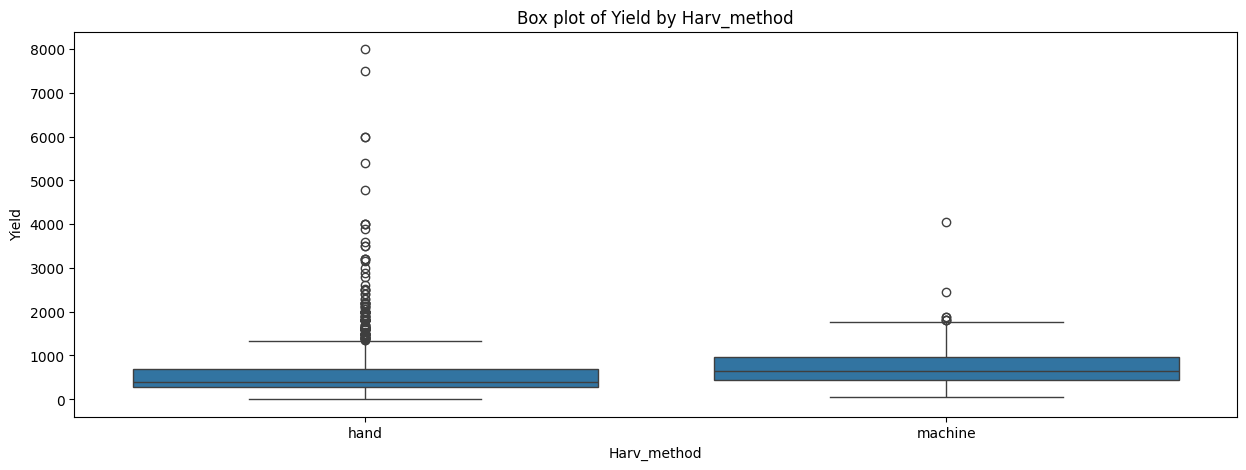

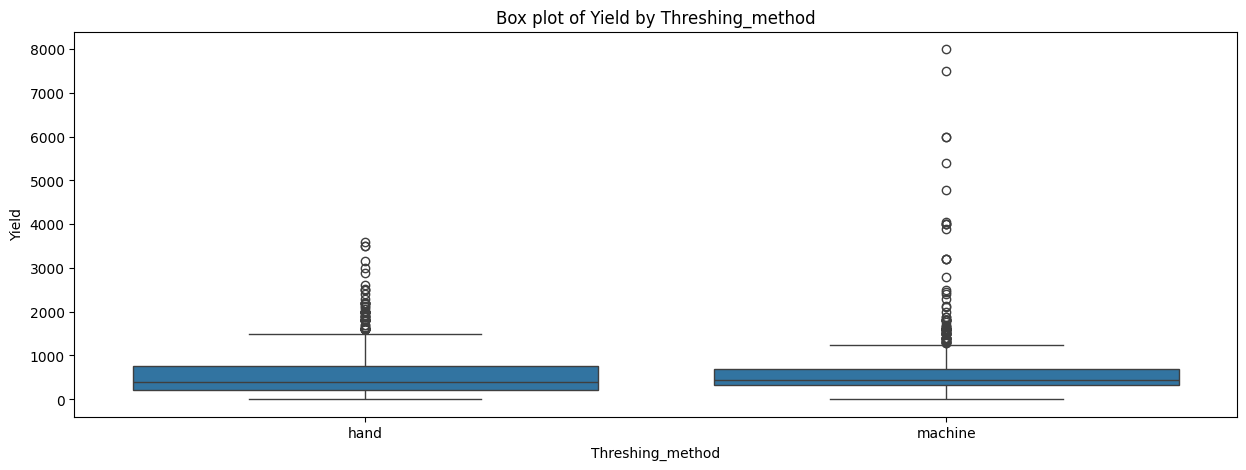

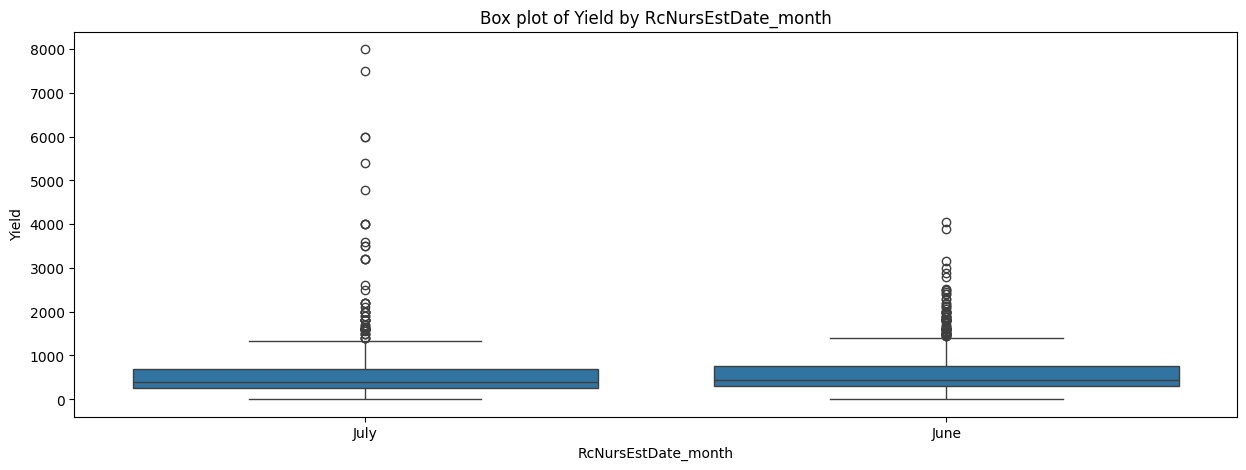

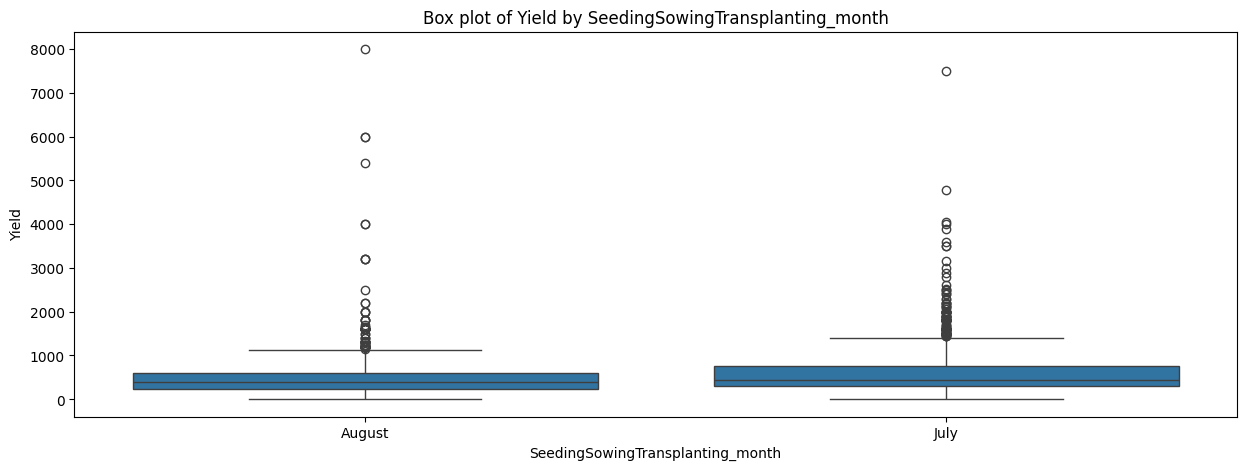

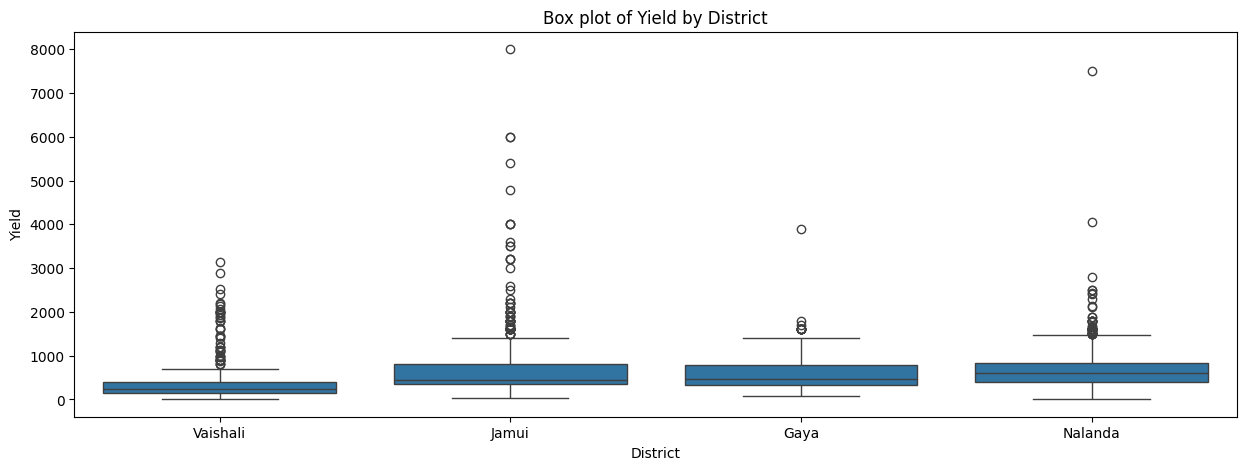

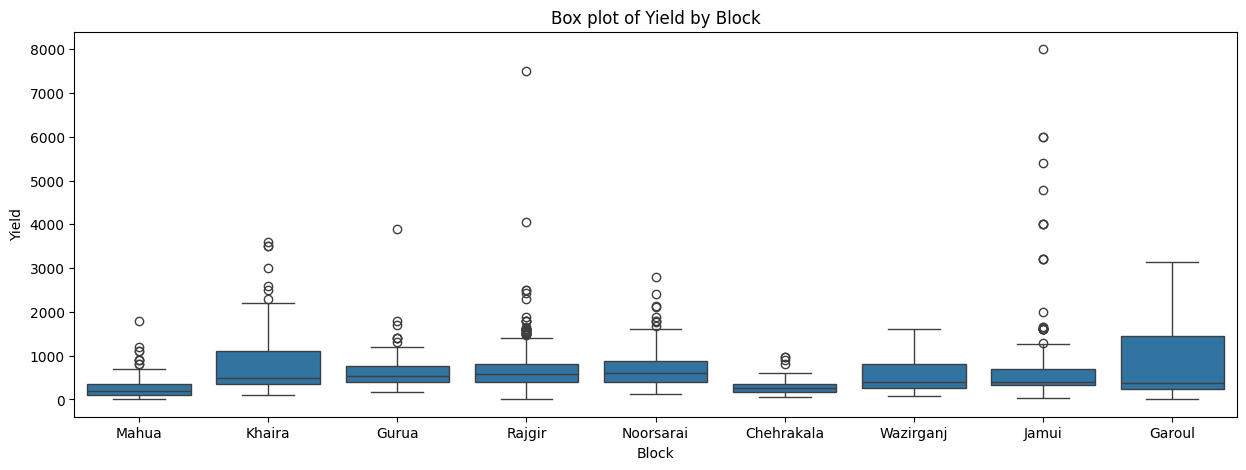

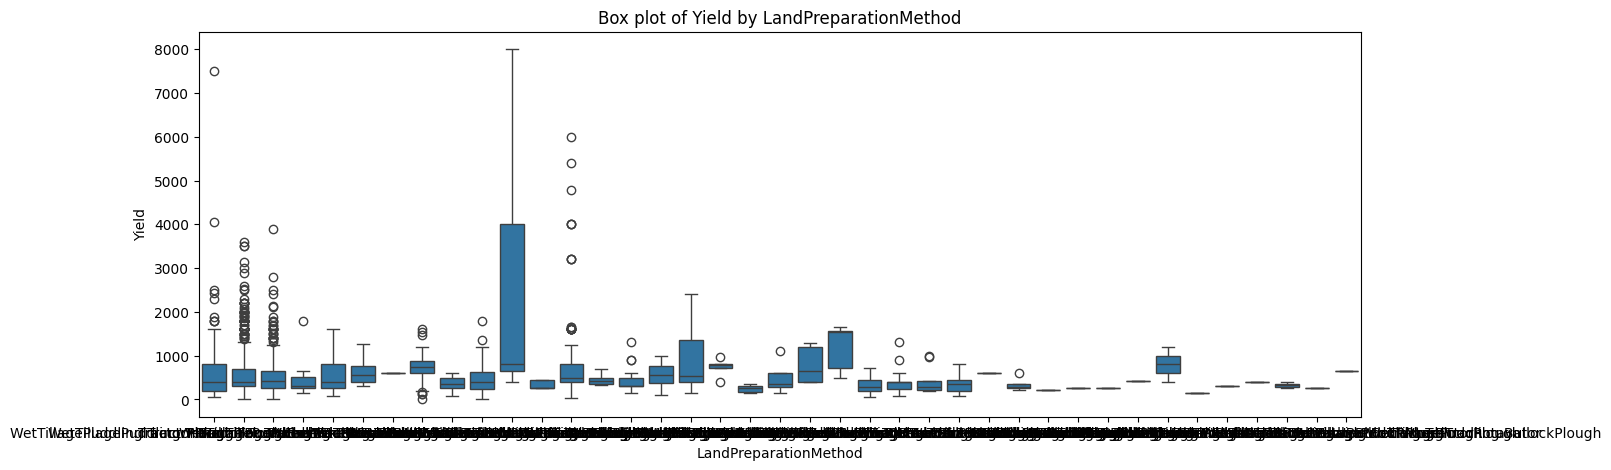

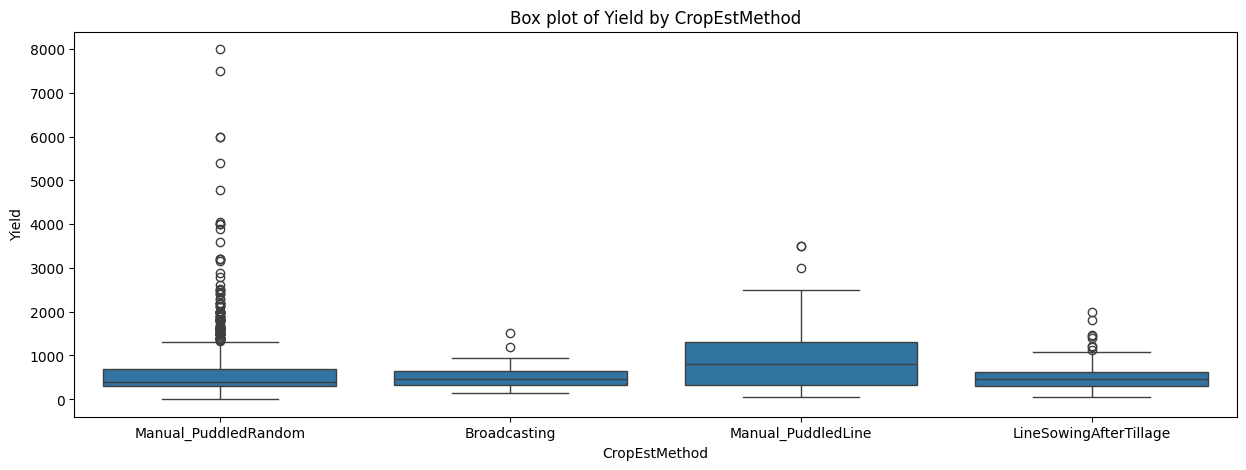

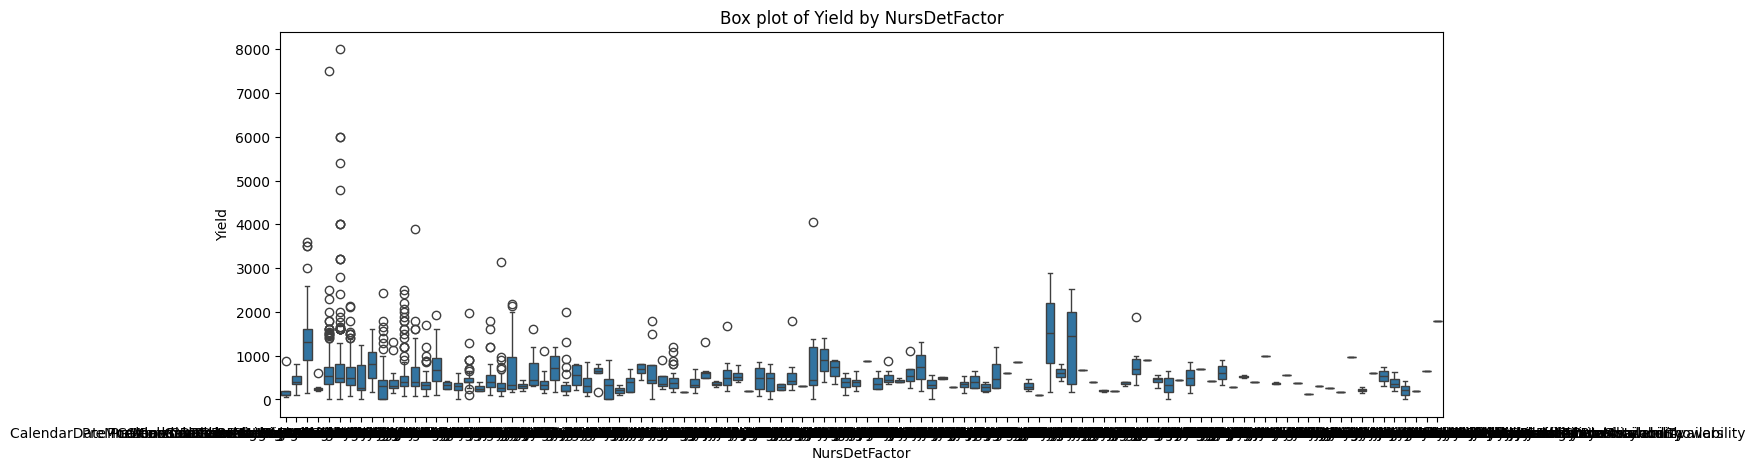

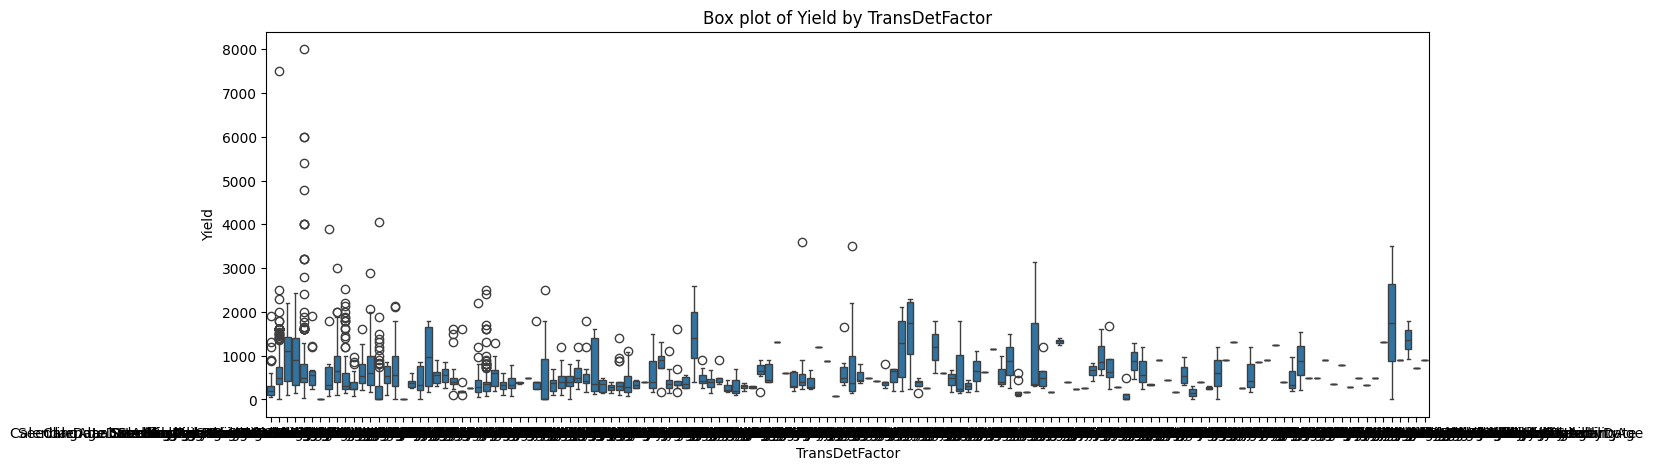

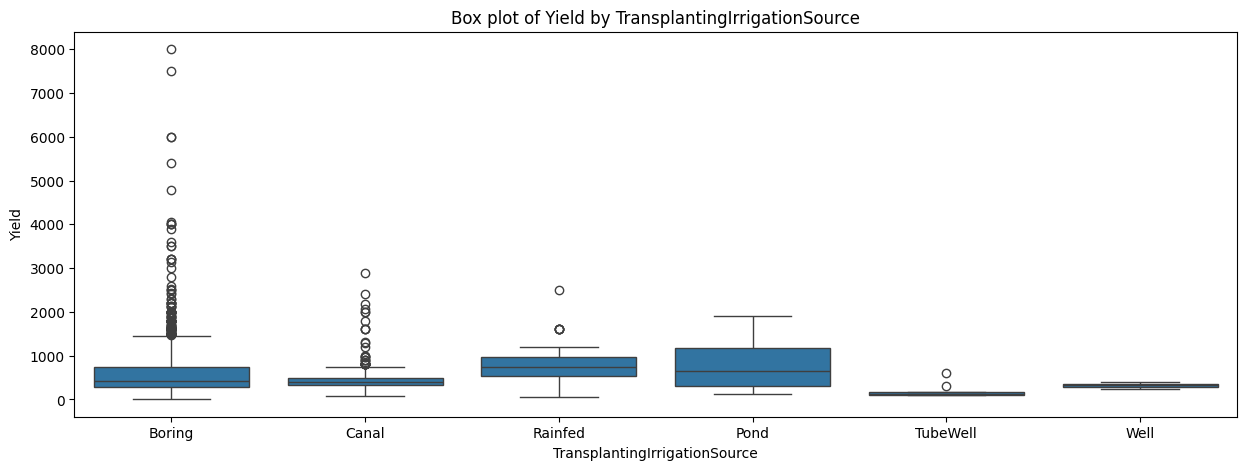

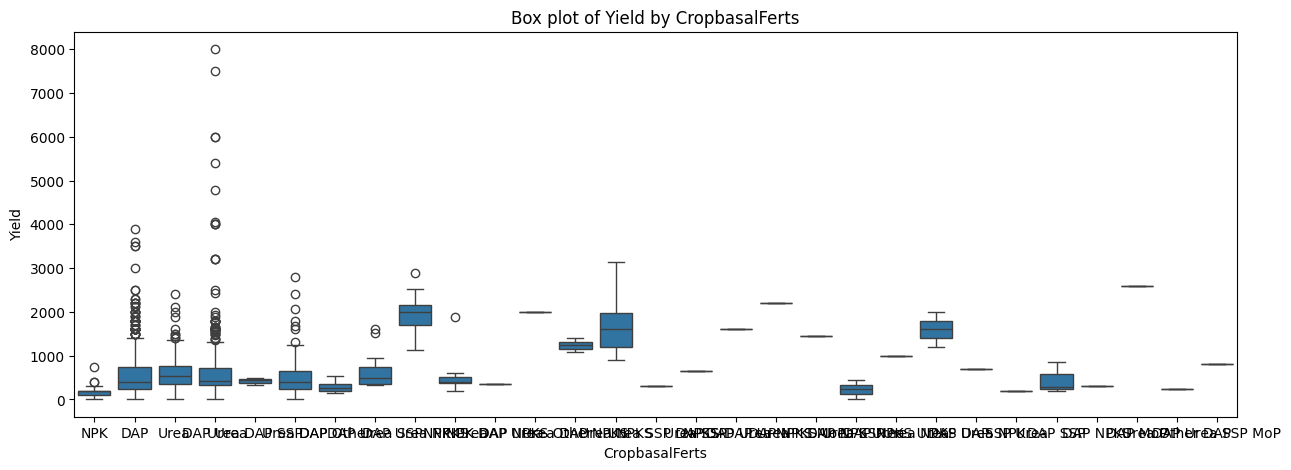

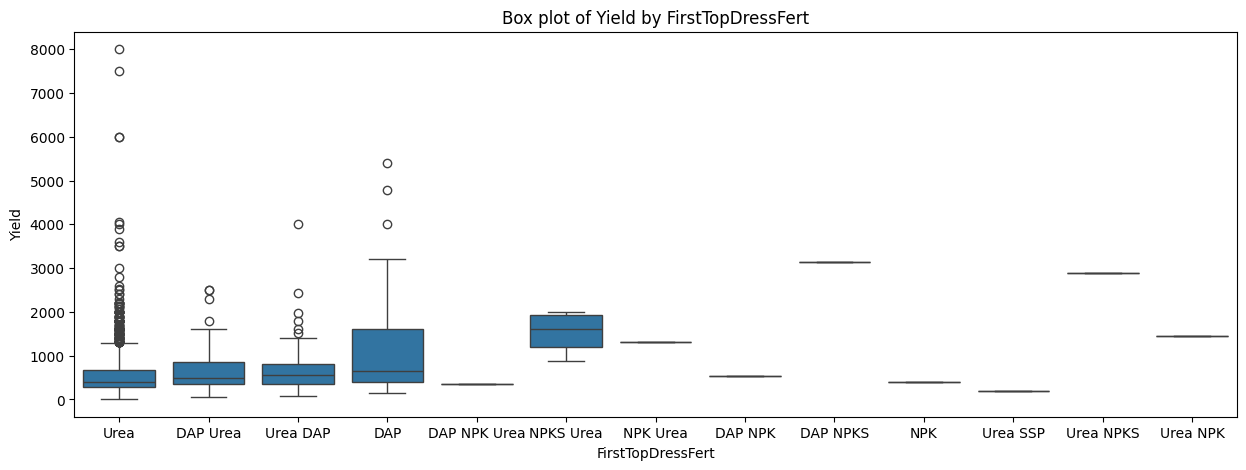

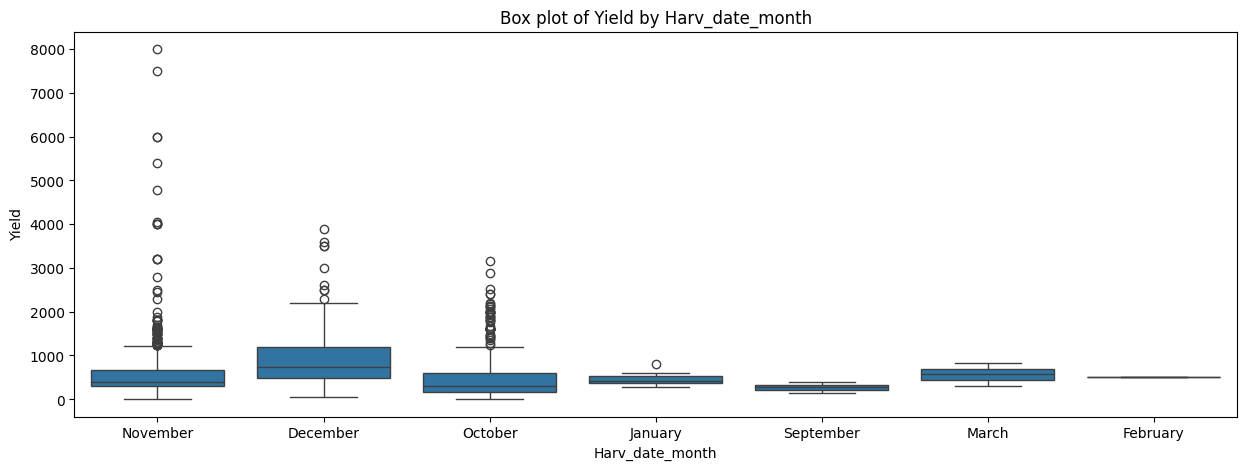

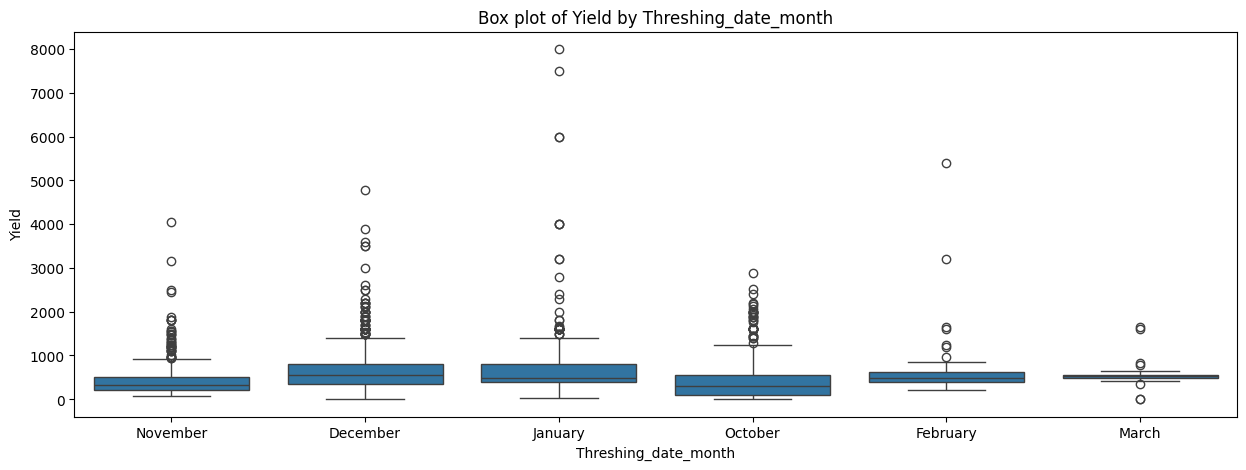

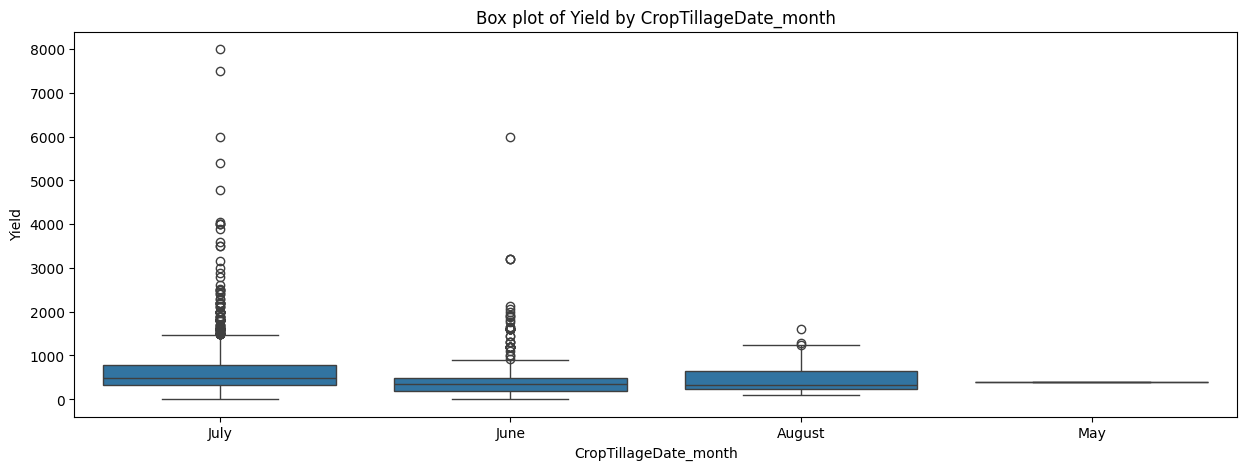

In [17]:
categorical_columns = [col for col in training_data.columns if training_data[col].dtype == 'object']
target_column = 'Yield'


for column in categorical_columns:
  plt.figure(figsize=(15, 5))
  sns.boxplot(x=column,y=target_column,data=training_data)
  plt.title(f'Box plot of {target_column} by {column}')
  plt.xlabel(column)
  plt.ylabel(target_column)

  plt.show()

In [18]:
#function to replace outliers with the upper and lower bound values
def cap_outliers(df, cat_columns, target_column):
    df_no_outliers = df.copy()

    for col in cat_columns:
      for category_value in df[col].unique():
        category_mask = (df[col] == category_value)
        Q1 = df_no_outliers.loc[category_mask, target_column].quantile(0.25)
        Q3 = df_no_outliers.loc[category_mask, target_column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_no_outliers.loc[category_mask, target_column] = np.where(df_no_outliers.loc[category_mask, target_column] > upper_bound, upper_bound,
        np.where(df_no_outliers.loc[category_mask, target_column] < lower_bound, lower_bound,df_no_outliers.loc[category_mask, target_column]))

    return df_no_outliers

In [19]:
#capping outliers in the training set
target_column = 'Yield'
cat_cols = [col for col in training_data.columns if training_data[col].dtype == 'object']
filtered_df = cap_outliers(training_data, cat_cols, target_column)

In [20]:
filtered_df.shape

(2709, 18)

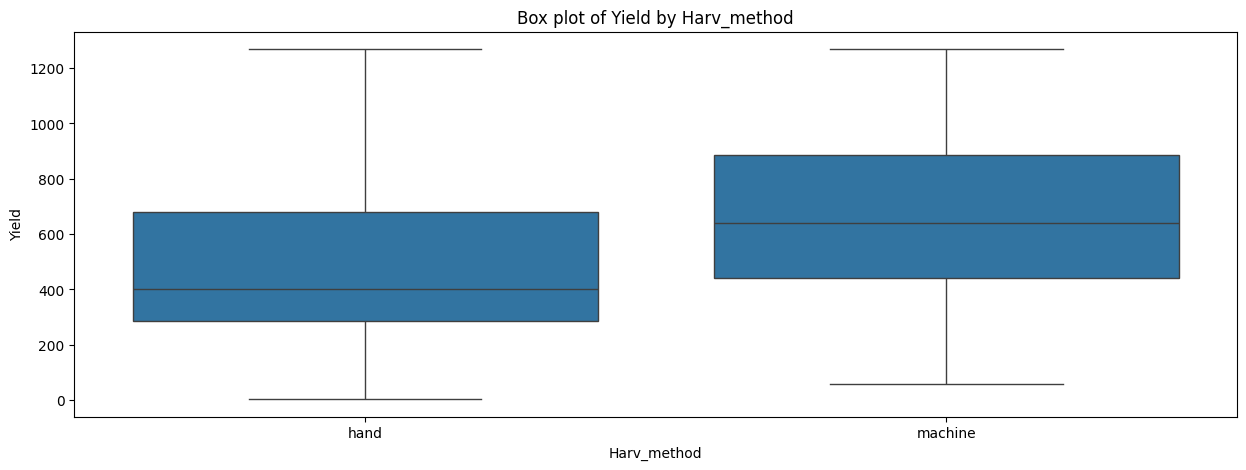

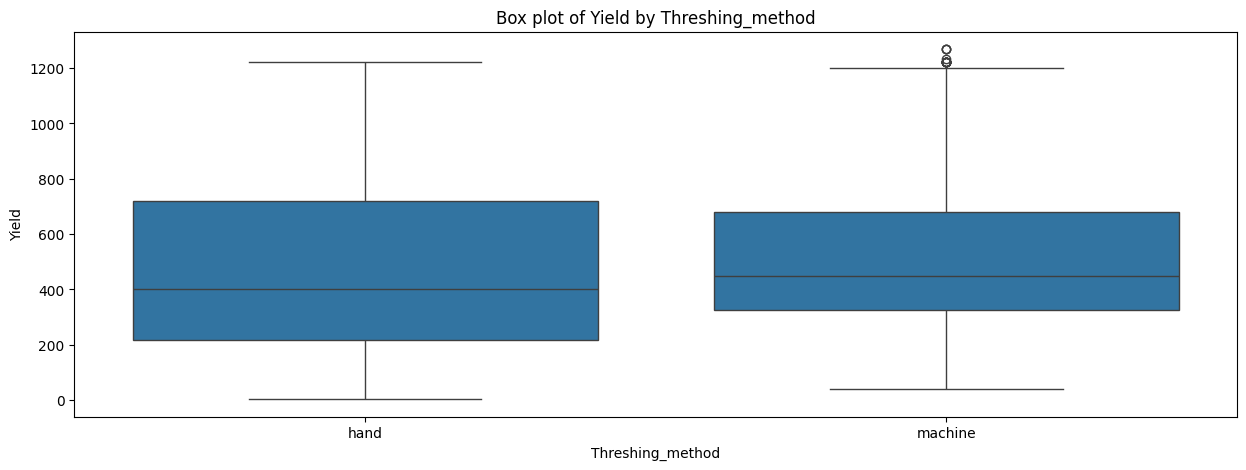

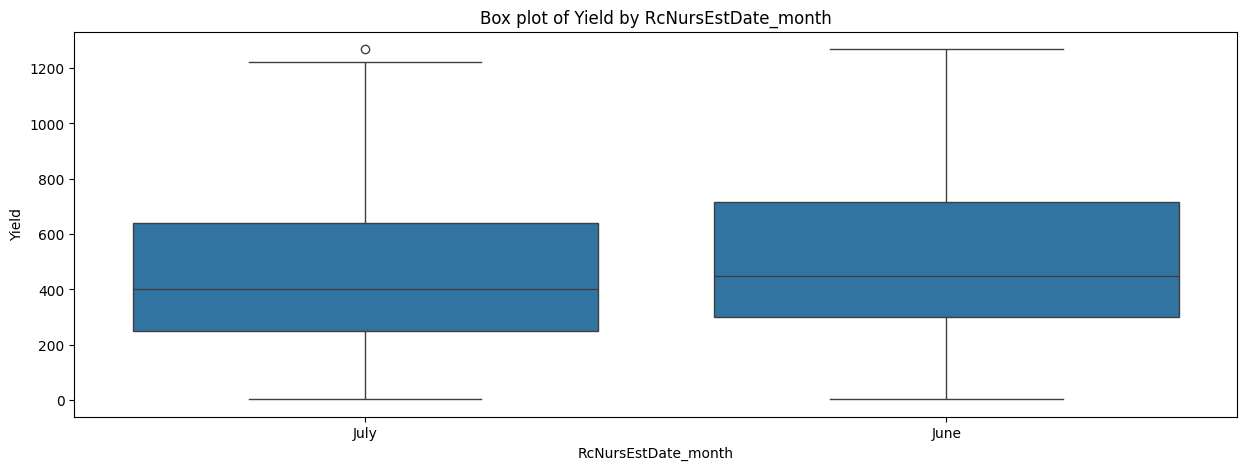

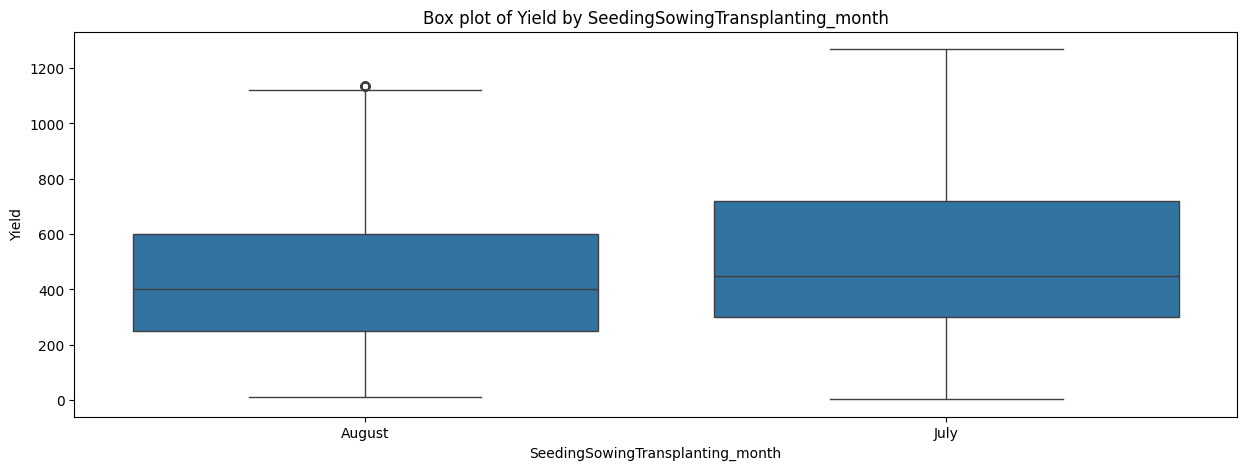

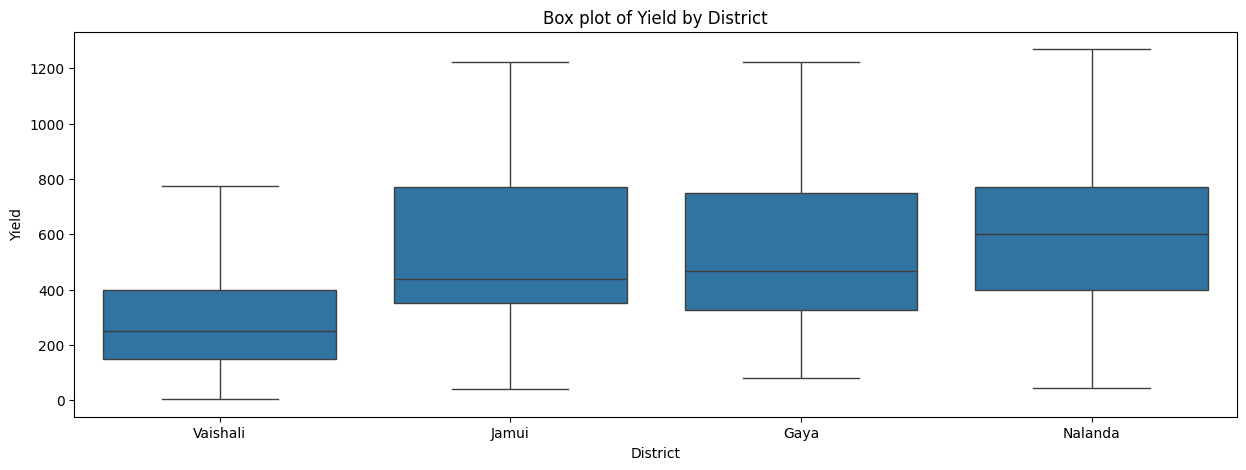

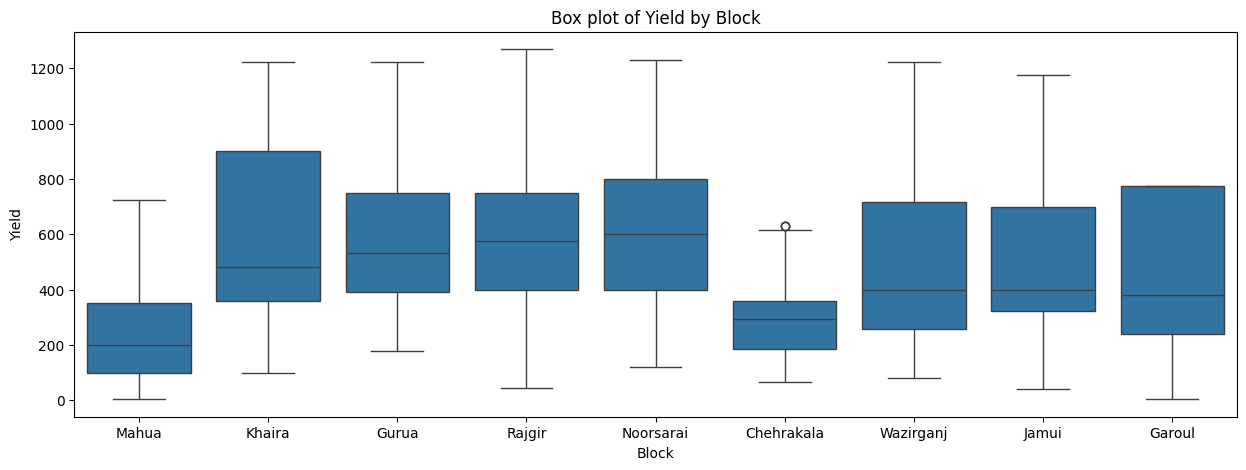

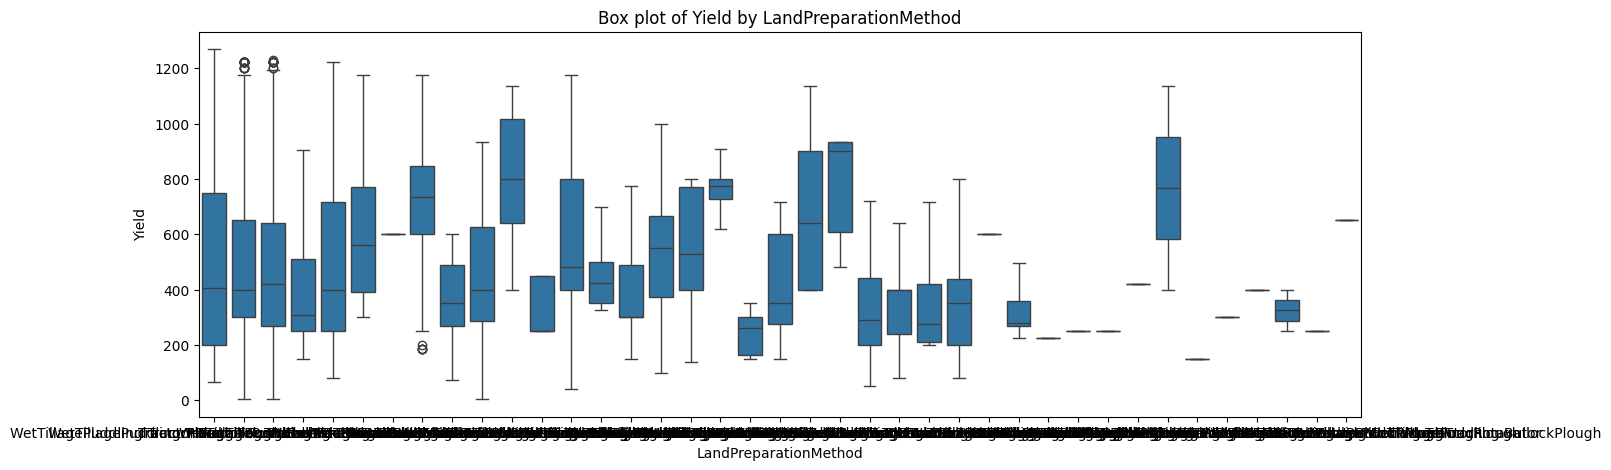

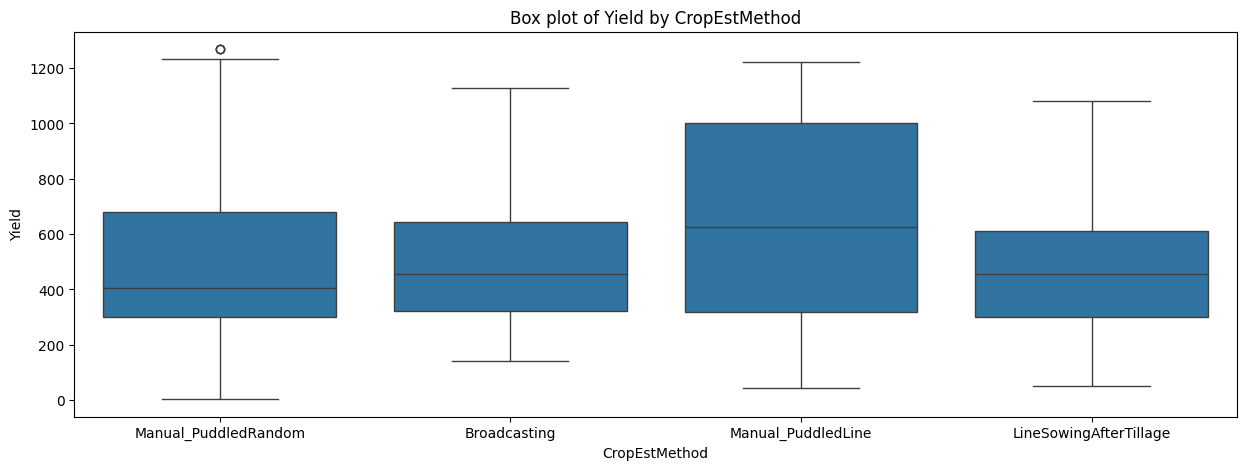

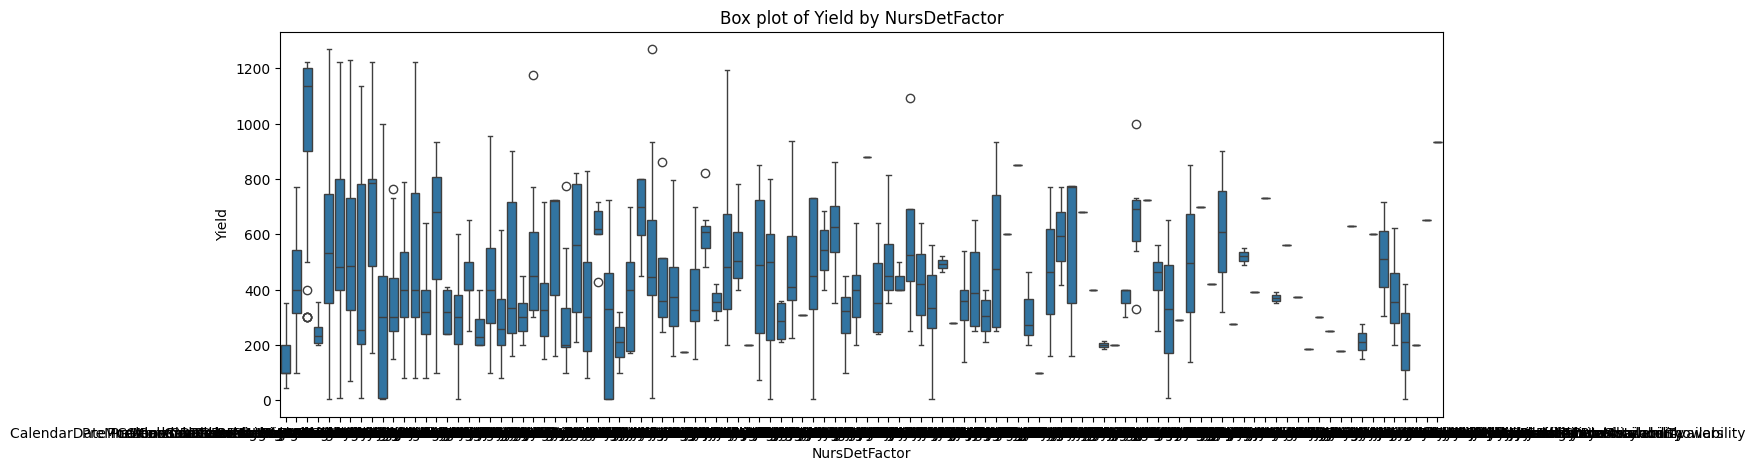

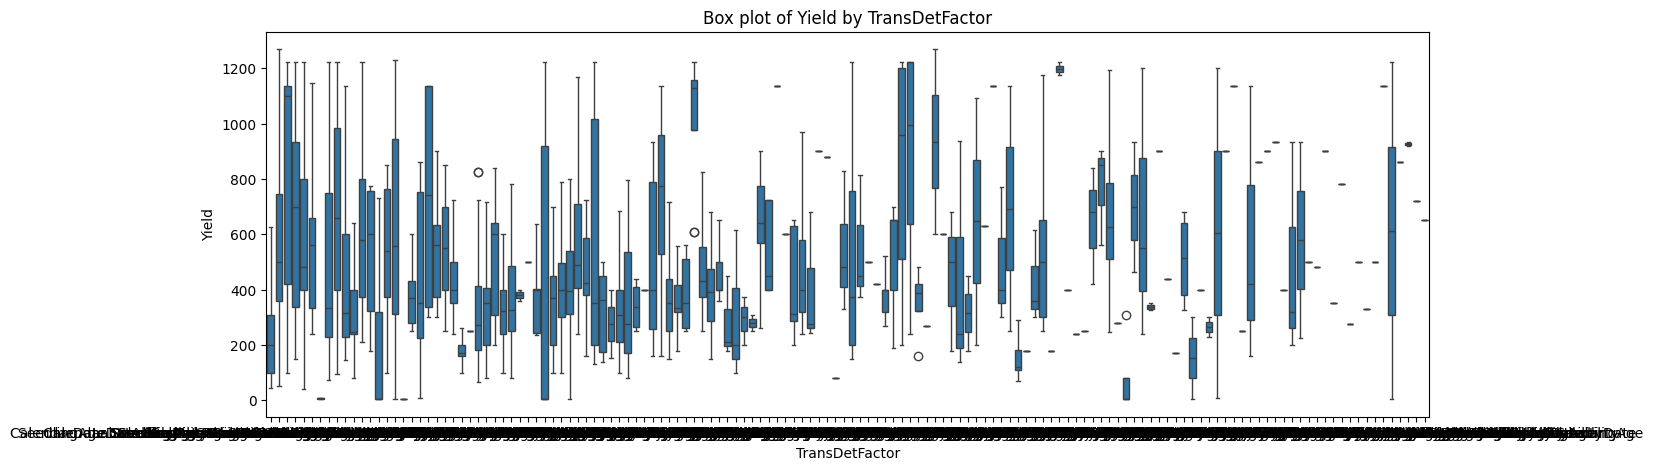

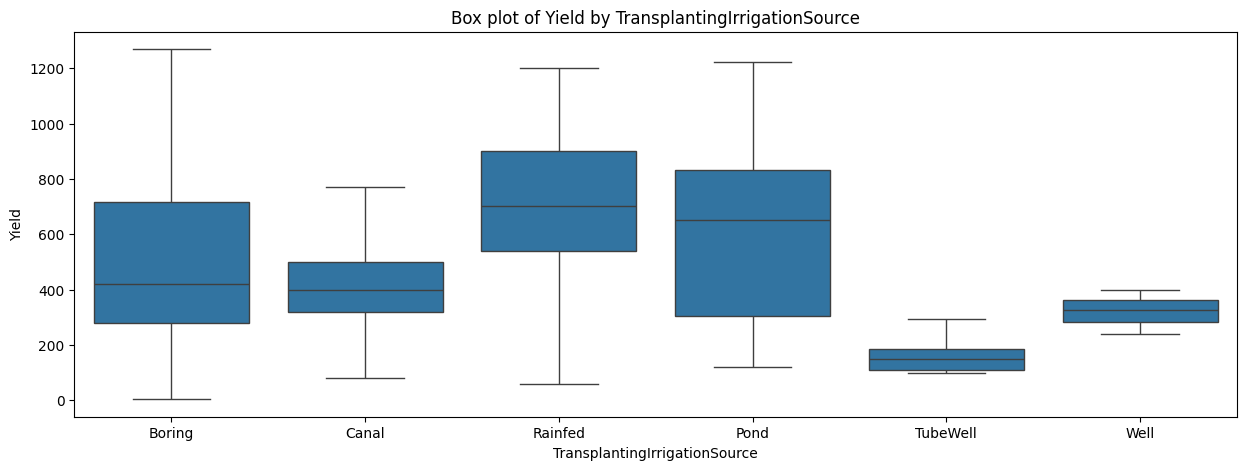

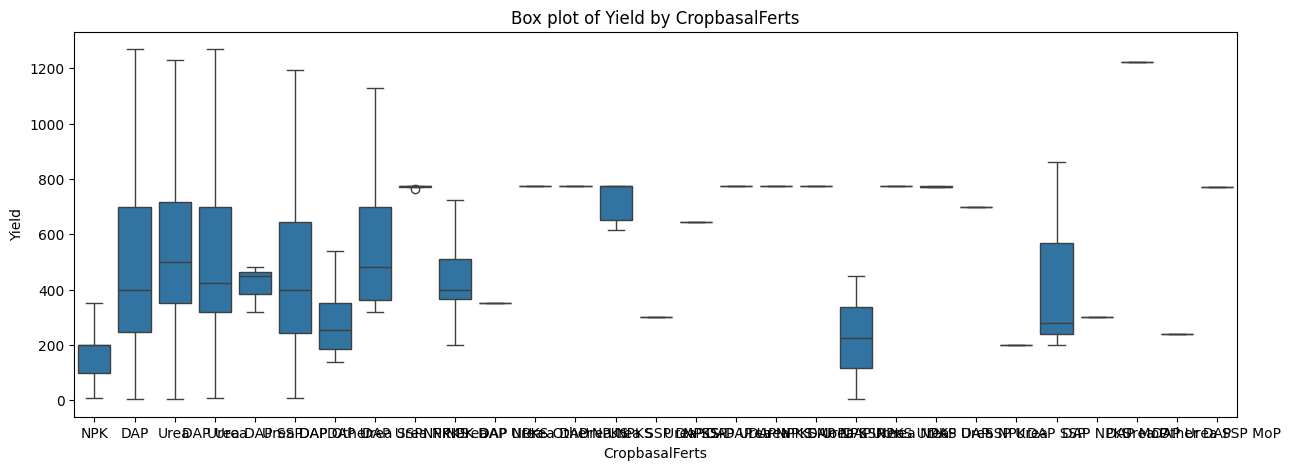

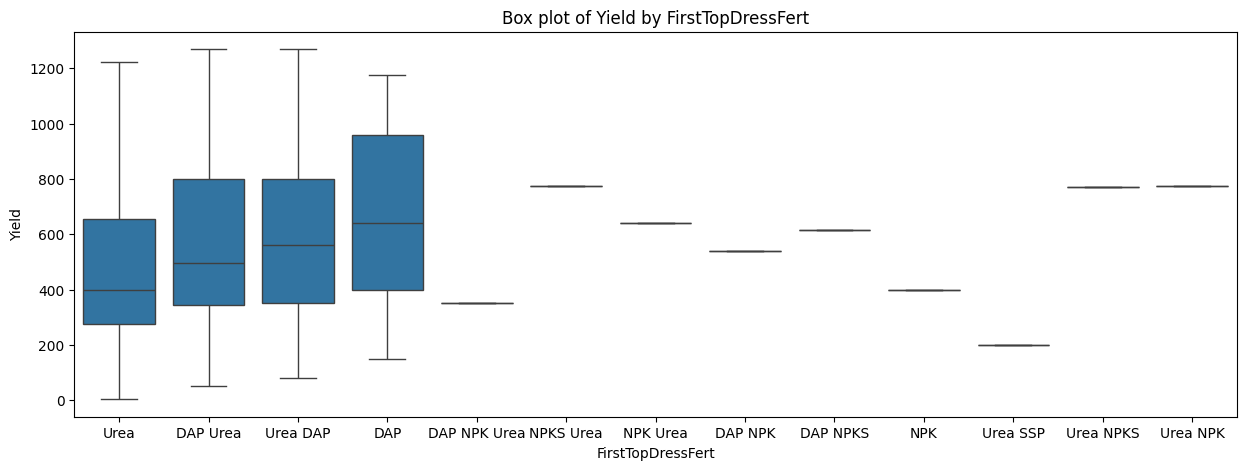

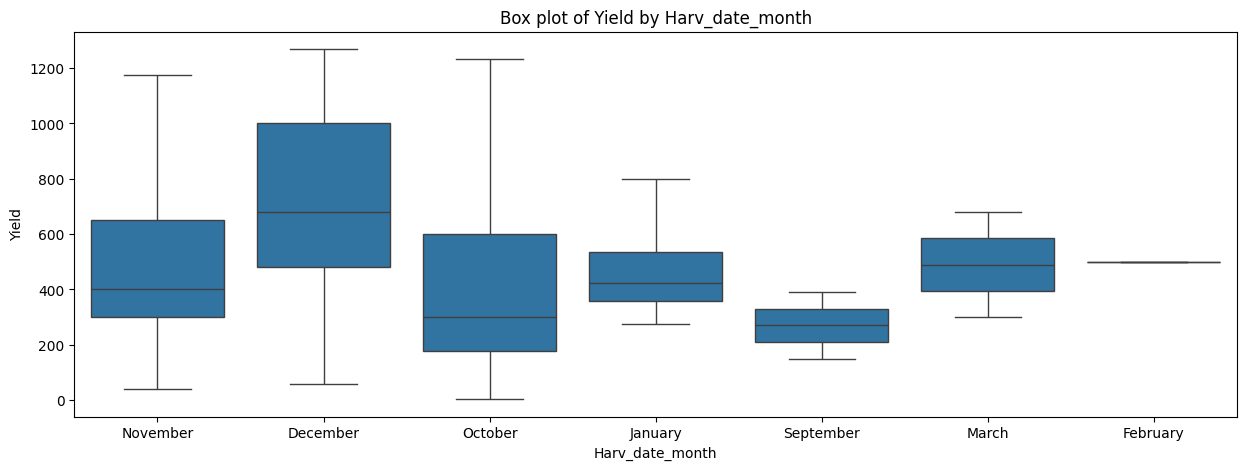

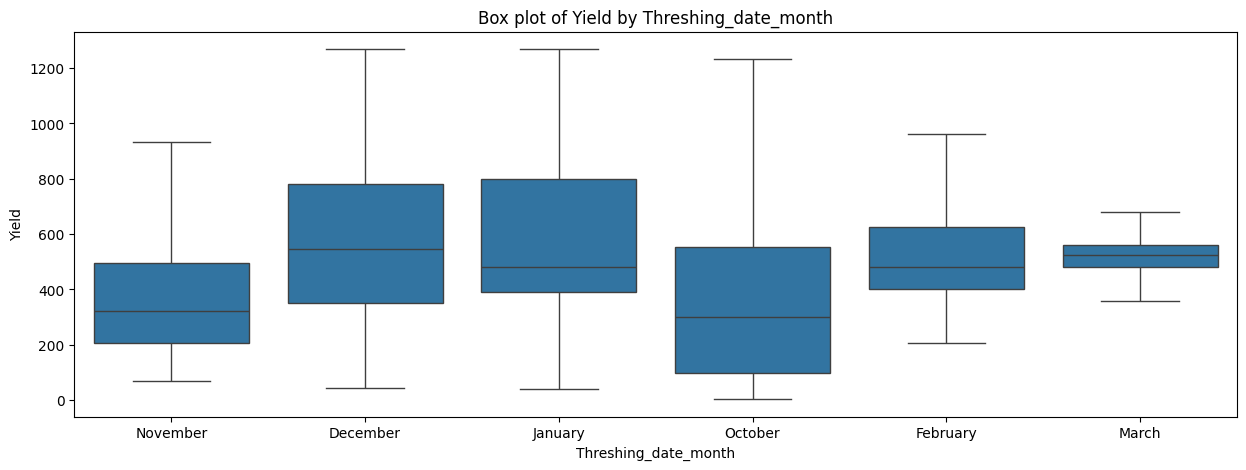

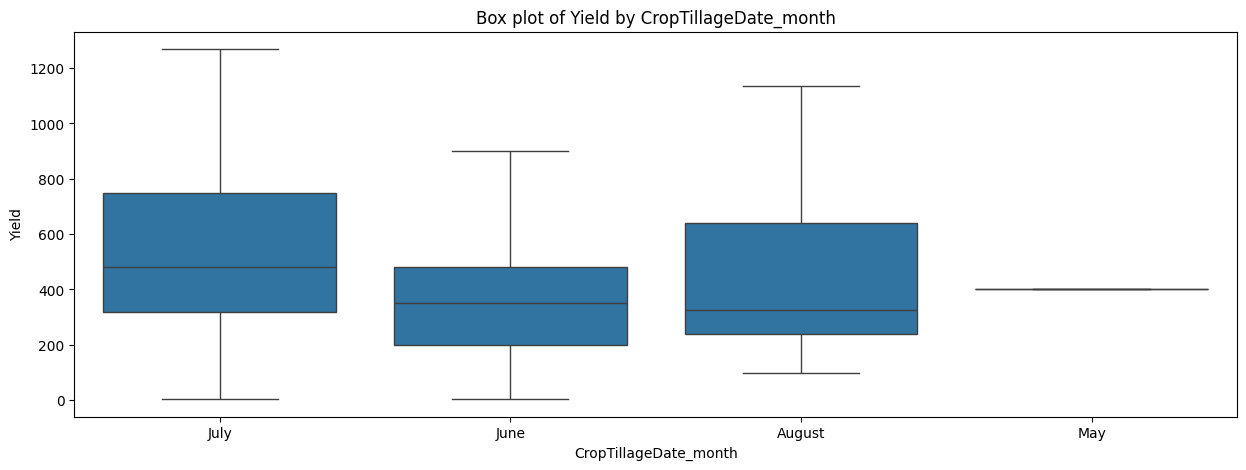

In [21]:
categorical_columns = [col for col in filtered_df.columns if filtered_df[col].dtype == 'object']
target_column = 'Yield'

for column in categorical_columns:
  plt.figure(figsize=(15, 5))
  sns.boxplot(x=column,y=target_column,data=filtered_df)
  plt.title(f'Box plot of {target_column} by {column}')
  plt.xlabel(column)
  plt.ylabel(target_column)

  plt.show()

In [22]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [23]:
#conducting feature encoding on the training set
categorical_columns = filtered_df.select_dtypes(include=['object']).columns

columns_to_target_encode = [col for col in categorical_columns if filtered_df[col].nunique() >= 10]
columns_to_one_hot_encode = [col for col in categorical_columns if filtered_df[col].nunique() < 10]

training_one_hot_encodeed = filtered_df[columns_to_one_hot_encode]
training_target_encoded = filtered_df[columns_to_target_encode]
training_target_encoded['Yield'] = filtered_df['Yield']

import category_encoders as ce
target_encoder = ce.TargetEncoder()
training_target_encoded = target_encoder.fit_transform(training_target_encoded, training_target_encoded['Yield'])

training_one_hot_encodeed = pd.get_dummies(training_one_hot_encodeed,drop_first=True)

training_encoded = pd.concat([training_target_encoded, training_one_hot_encodeed], axis=1)
X_train_encoded = training_encoded.drop(['Yield'],axis=1)
X_train = filtered_df.drop(['Yield'],axis=1)
y_train = y_train = filtered_df.iloc[:,-1:]

In [24]:
#capping outliers in the testing set
testing_data = pd.concat([X_test, y_test[y_test.columns[0]]], axis=1)
target_column = 'Yield'
cols = [col for col in testing_data.columns if testing_data[col].dtype=='object']
filtered_testing_df = cap_outliers(testing_data, cols, target_column)

In [25]:
X_test_target_encoded = filtered_testing_df[columns_to_target_encode]
X_test_one_hot_encoded = filtered_testing_df[columns_to_one_hot_encode]
X_test_target_encoded['Yield'] = filtered_testing_df['Yield']

import category_encoders as ce
target_encoder = ce.TargetEncoder()
X_test_target_encoded = target_encoder.fit_transform(X_test_target_encoded, X_test_target_encoded['Yield'])

X_test_one_hot_encoded = pd.get_dummies(X_test_one_hot_encoded,drop_first=True)

X_test_encoded_merged = pd.concat([X_test_target_encoded, X_test_one_hot_encoded], axis=1)
X_test_encoded = X_test_encoded_merged.drop(['Yield'],axis=1)
missing_cols = [col for col in X_train_encoded.columns if col not in X_test_encoded.columns]
for col in missing_cols:
  X_test_encoded[col] = 0
X_test_encoded = X_test_encoded[X_train_encoded.columns]
X_test = filtered_testing_df.drop(['Yield'],axis=1)
y_test = filtered_testing_df.iloc[:,-1:]

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)
#X_validation_scaled = scaler.transform(X_val)

In [27]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred = linear_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)  # Evaluating on test data
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("RMSE Score on Test Data:", rmse)
print("R-squared Score on Test Data:", r_squared)

RMSE Score on Test Data: 224.5860465232487
R-squared Score on Test Data: 0.40608242574248965


In [28]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

rf_model.fit(X_train_encoded, y_train)
y_pred = rf_model.predict(X_test_encoded)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 45375.332416205296
Root Mean Squared Error (RMSE): 213.01486430811653
R-squared (R2): 0.4657058048927172


In [29]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model_cv = RandomForestRegressor(n_estimators=100, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

y_cv_pred = cross_val_predict(rf_model_cv, X_train, y_train, cv=kf)

rmse = np.sqrt(mean_squared_error(y_train, y_cv_pred))
print(f"Cross-validated Root Mean Squared Error (RMSE): {rmse}")

ValueError: could not convert string to float: 'hand'

In [30]:
pip install catboost


   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 330.3 kB/s eta 0:05:06
   ---------------------------------------- 0.0/101.1 MB 245.8 kB/s eta 0:06:52
   ---------------------------------------- 0.1/101.1 MB 328.2 kB/s eta 0:05:08
   ---------------------------------------- 0.1/101.1 MB 469.7 kB/s eta 0:03:35
   ---------------------------------------- 0.2/101.1 MB 541.0 kB/s eta 0:03:07
   ---------------------------------------- 0.2/101.1 MB 623.6 kB/s eta 0:02:42
   ---------------------------------------- 0.3/101.1 MB 770.1 kB/s eta 0:02:11
   ---------------------------------------- 0.4/101.1 MB 933.2 kB/s eta 0:01:48
   ---------------------------------------- 0.5/101.1 MB 1.1 MB/s eta 0:01:34
   ---------------------------------------- 0.7/101.1 MB 1.3 MB/s eta 0:01:17
   ---------------------------------------- 0.8/101.1 MB 1.6 

In [31]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, mean_squared_error

In [32]:
cat_columns=[col for col in X_train.columns if X_train[col].dtype=='object']

In [33]:
catboost_model = CatBoostRegressor(
    iterations=350,
    depth=15,
    learning_rate=0.1,
    loss_function='RMSE',
    cat_features=cat_columns
)

catboost_model.fit(X_train, y_train)

0:	learn: 271.0624002	total: 207ms	remaining: 1m 12s
1:	learn: 252.4955533	total: 263ms	remaining: 45.7s
2:	learn: 235.9330145	total: 334ms	remaining: 38.7s
3:	learn: 221.2779356	total: 438ms	remaining: 37.9s
4:	learn: 208.2414675	total: 2.5s	remaining: 2m 52s
5:	learn: 196.8904203	total: 2.57s	remaining: 2m 27s
6:	learn: 186.3959958	total: 3.84s	remaining: 3m 8s
7:	learn: 177.8777362	total: 3.87s	remaining: 2m 45s
8:	learn: 169.1264447	total: 6.8s	remaining: 4m 17s
9:	learn: 162.4651707	total: 6.86s	remaining: 3m 53s
10:	learn: 155.6768003	total: 7.22s	remaining: 3m 42s
11:	learn: 151.3123758	total: 7.29s	remaining: 3m 25s
12:	learn: 146.1968448	total: 7.47s	remaining: 3m 13s
13:	learn: 141.5833451	total: 7.57s	remaining: 3m 1s
14:	learn: 136.0462044	total: 10.9s	remaining: 4m 3s
15:	learn: 131.1166662	total: 14.2s	remaining: 4m 56s
16:	learn: 129.2928726	total: 14.3s	remaining: 4m 39s
17:	learn: 125.0977704	total: 17.7s	remaining: 5m 26s
18:	learn: 122.6516069	total: 17.8s	remaining:

In [34]:
y_pred = catboost_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 13685.406301576651
Root Mean Squared Error (RMSE): 116.98464130635547
R-squared (R2): 0.8388544445791074


In [37]:
model_dir = 'C:\\Users\\PC\\Documents\\Python Test files\\crop yield'
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'catboost_model')
catboost_model.save_model(model_path)

In [ ]:
from catboost import CatBoost

In [ ]:
from catboost import CatBoost
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import randint

catboost = CatBoostRegressor()
categorical_columns = [col for col in X_train.columns if X_train[col].dtype=='object']
X_train[categorical_columns] = X_train[categorical_columns].astype('category')

catboost = CatBoostRegressor(cat_features=categorical_columns)

param_dist = {
    'iterations': randint(200, 800),
    'depth': randint(10, 17),
    'learning_rate': [0.1, 0.01, 1]
}

random_search = RandomizedSearchCV(
    catboost,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", -random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [60]:
test=pd.read_csv('Test.csv')
submission = pd.read_csv('submission.csv')

In [61]:
test_instance=DataCleaning(test)

In [62]:
test_instance.dropna()
test_instance.imputer()
test_instance.convert_to_date_and_extract_month()

In [63]:
test.isnull().sum()

ID                                    0
District                              0
Block                                 0
CultLand                              0
CropCultLand                          0
LandPreparationMethod                 0
CropTillageDepth                      0
CropEstMethod                         0
SeedlingsPerPit                       0
NursDetFactor                         0
TransDetFactor                        0
TransplantingIrrigationHours          0
TransplantingIrrigationSource         0
TransplantingIrrigationPowerSource    0
TransIrriCost                         0
StandingWater                         0
OrgFertilizers                        0
PCropSolidOrgFertAppMethod            0
NoFertilizerAppln                     0
CropbasalFerts                        0
BasalDAP                              0
BasalUrea                             0
MineralFertAppMethod                  0
FirstTopDressFert                     0
1tdUrea                               0


In [64]:
test = test[X_train.columns]

In [66]:
predictions = catboost_model.predict(test)

In [67]:
predictions

array([557.33339006, 375.6384902 , 483.92742176, ..., 199.87914992,
       357.21696581, 347.51019905])

In [68]:
submission.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,517.88662
1,ID_SO3VW2X4QO93,392.85246
2,ID_UKUQ7JM8E894,473.03895
3,ID_QUISMWEZR2H4,323.60251
4,ID_25JGI455VKCZ,553.05369


In [69]:
submission['Yield']=predictions

In [70]:
submission.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,557.33339
1,ID_SO3VW2X4QO93,375.63849
2,ID_UKUQ7JM8E894,483.92742
3,ID_QUISMWEZR2H4,345.53112
4,ID_25JGI455VKCZ,538.14253


In [71]:
submission.to_csv('late_submission.csv', index=False)